In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
data=pd.read_csv('C:/Users/91720/OneDrive/Desktop/regressin/hox.csv')

In [3]:
#display 5 rows of the datasheet
print(data.head())

#display summary 
print (data.describe())

#check missing values
print (data.isnull().sum())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545

In [4]:
#list of categorical and numerical features
categorical_features = ['mainroad','guestroom','basement','hotwaterheating','airconditioning', 'prefarea', 'furnishingstatus' ]
numerical_features=[ 'area',  'bedrooms',  'bathrooms' , 'stories' , 'parking'  ]


#preprocessing for numerical data
numerical_transformer = StandardScaler()

#preprocessing for categorical data
categorical_transformer = OneHotEncoder(drop='first')

#Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
transformers=[('num', numerical_transformer, numerical_features), ('cat', categorical_transformer,categorical_features)])

In [5]:
#define features and target variables
x=data.drop(columns= 'price')
y= data['price']

#Split data into training and testing sets
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2,random_state=42)

In [6]:
#model defining
model=Pipeline(steps=[('preprocessor',preprocessor),
                      ('regressor',LinearRegression())])

In [7]:
#training
model.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['area', 'bedrooms',
                                                   'bathrooms', 'stories',
                                                   'parking']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['mainroad', 'guestroom',
                                                   'basement',
                                                   'hotwaterheating',
                                                   'airconditioning',
                                                   'prefarea',
                                                   'furnishingstatus'])])),
                ('regressor', LinearRegression())])

In [8]:
#prediction of data
y_pred= model.predict(x_test)

#mean Squared Error and R^2 Score
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f'mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

mean Squared Error: 1754318687330.6672
R^2 Score: 0.6529242642153177


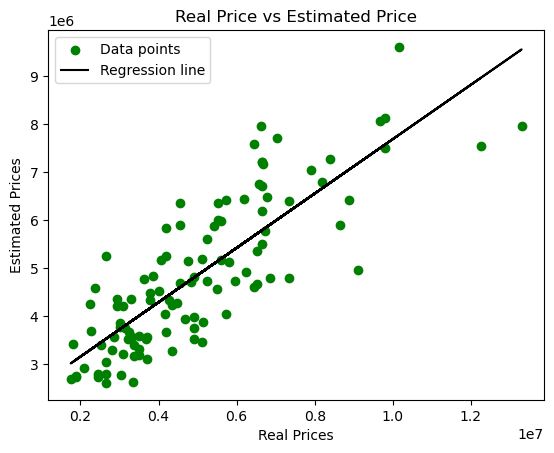

In [9]:
#real vs estimated prices
plt.scatter(y_test,y_pred,color='green',label='Data points')

#add line
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),color='black',label='Regression line')

# label,title,legend
plt.xlabel('Real Prices')
plt.ylabel('Estimated Prices')
plt.title('Real Price vs Estimated Price')
plt.legend()

#display
plt.show()